In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# =======================
# Load & prepare data
# =======================
df = pd.read_csv("dataset/T1.csv", parse_dates=['Date/Time'])

# Now convert to datetime with dayfirst=True (since your format is day month year)
df['Date/Time'] = pd.to_datetime(df['Date/Time'], dayfirst=True)
df = df.sort_values('Date/Time')

# Calculate time_diff first
df['time_diff'] = df['Date/Time'].diff().dt.total_seconds().div(60)
df['time_diff'].fillna(0, inplace=True)  # Handle first row NaN

features = ['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)', 'time_diff']
target = 'LV ActivePower (kW)'

X = df[features]
y = df[target]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Features: {features}")

X shape: (50530, 4)
y shape: (50530,)
Features: ['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)', 'time_diff']


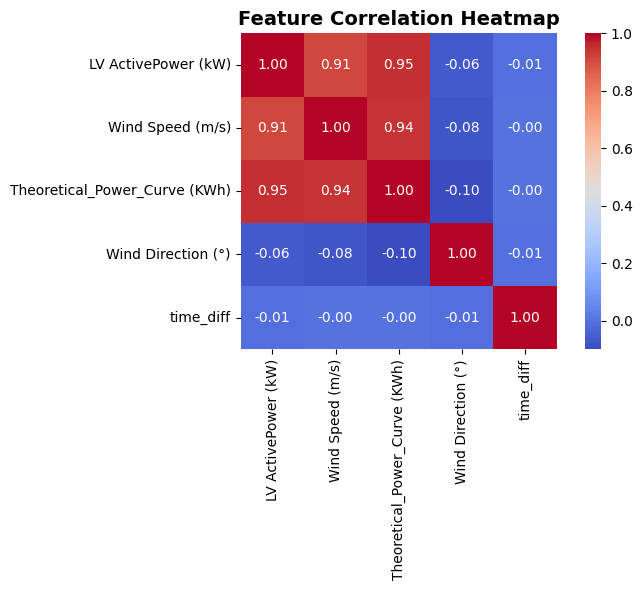

In [3]:
# Assuming df is your SCADA dataframe
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Feature Correlation Heatmap", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


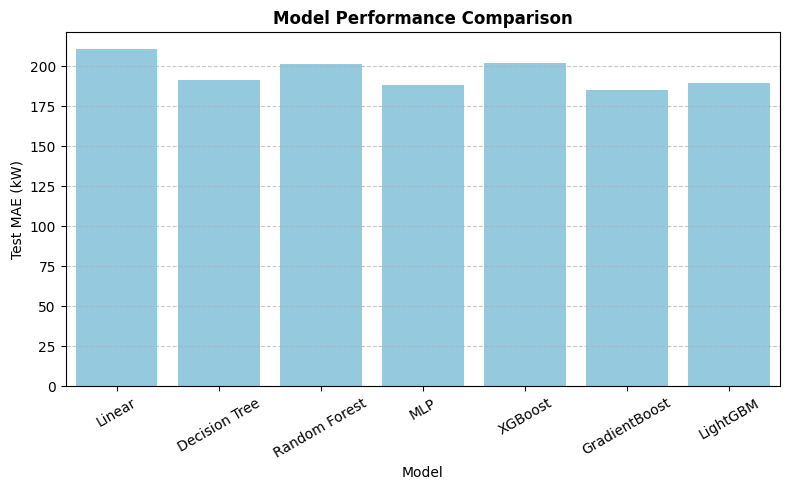

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Linear', 'Decision Tree', 'Random Forest', 'MLP', 'XGBoost', 'GradientBoost', 'LightGBM']
mae = [210.77, 191.40, 201.23, 188.09, 202.17, 185.03, 189.70]
r2 = [0.934, 0.890, 0.867, 0.913, 0.908, 0.893, 0.881]

fig, ax1 = plt.subplots(figsize=(8,5))
sns.barplot(x=models, y=mae, color='skyblue', ax=ax1)
ax1.set_ylabel('Test MAE (kW)')
ax1.set_xlabel('Model')
ax1.set_title('Model Performance Comparison', weight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Power Output (kW)')
plt.ylabel('Predicted Power Output (kW)')
plt.title('Predicted vs Actual Power Output (MLP Model)', weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Output in the previous notebook


C:\Users\User\AppData\Local\Temp\ipykernel_25328\906665048.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delta_mae, y=configs, palette="coolwarm", orient='h')


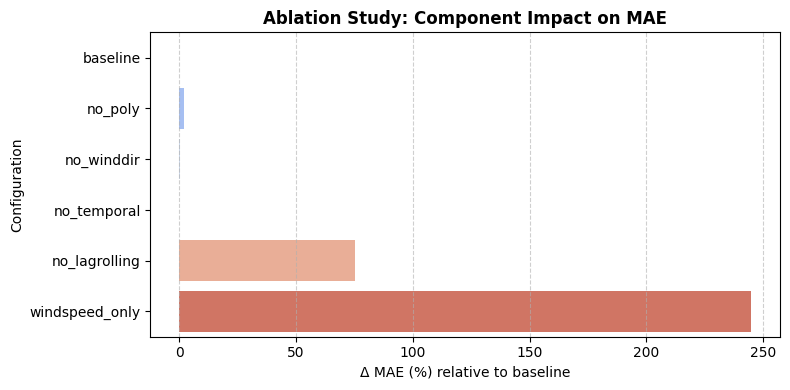

In [6]:
configs = ['baseline', 'no_poly', 'no_winddir', 'no_temporal', 
           'no_lagrolling', 'windspeed_only']
delta_mae = [0, 2.25, 0.26, -0.01, 75.43, 244.92]

plt.figure(figsize=(8,4))
sns.barplot(x=delta_mae, y=configs, palette="coolwarm", orient='h')
plt.xlabel('Δ MAE (%) relative to baseline')
plt.ylabel('Configuration')
plt.title('Ablation Study: Component Impact on MAE', weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
